# Week 9 Discussion 8: Support Vector Machines (03/21/2024)

## Objectives

***Support Vector Machines*** (SVM) represent a powerful and versatile class of supervised machine learning algorithms. At its core, **SVM is a binary classification algorithm** that operates by finding the optimal hyperplane that separates data points belonging to different classes in a high-dimensional space. Unlike some other classification methods, SVM aims to **maximize the margin**, which is the distance between the hyperplane and the nearest data points from each class. This approach not only ensures robustness against overfitting but also enhances the algorithm's generalization capability.

This week's discussion will delve into various key aspects:

1. We'll begin by providing an **overview** of the SVM formulation, exploring its core concepts.

2. Next, we'll delve into the **dual formulation** of SVM, transitioning from the **linearly separable** case to the **linearly non-separable** case.

3. Having the optimization at hand, we talk about how we can actually solve that optimization problem in `Python` using the `CVXOPT` library.

4. Finally, to test the **implementation**, we'll create a linearly non-separable binary classification dataset and apply a linear and a nonlinear kernel to see which one is able to separate the two classes.

## Sources
This discussion is based on the following references:

Murphy, Kevin P. Probabilistic machine learning: an introduction. MIT press, 2022.

[blog post](https://mbhaskar1.github.io/machine%20learning/2019/07/04/svm-using-cvxopt.html)


## SVM Review: The Primal Problem

Support Vector Machines (SVM) offer a mathematical framework for classification tasks that aims to find an optimal decision boundary separating different classes of data points. In the original formulation, the decision function for a feature vector $x_i \in \mathbb{R}^k$ is:
$$
f(x) = sign(w^T x_i + w_0),
$$
where $w \in \mathbb{R}^k$ and $w_0 \in \mathbb{R}$ are the decision function parameters.
When fitting an SVM, the loss function typically used in SVM is the hinge loss, which is defined as:
$$
max(0, 1 - y_i (w^T x_i + w_0)),
$$
where $y_i \in \{-1, 1\}$. In words, we can make the following observations from this loss function:
* if $1 \leq y_i (w^T x_i + w_0)$, the datapoint is classified correctly by a "large" margin, so it will not contribute to the loss.
* if $0 \leq y_i (w^T x_i + w_0) < 1$, the datapoint is classified correctly but with a "smaller" margin, therefore contributing to the loss.
* if $y_i (w^T x_i + w_0) < 0$, the datapoint is miclassified, therefore contributing to the loss.

If we add $\ell_2$-regularization on weights as well, the empirical loss function we want to minimize would be:
$$
\ell oss = \frac{1}{2} \lambda ||w||^2 + \frac{1}{n} \sum_{i=1}^n max(0, 1 - y_i (w^T x_i + w_0)),
$$
which can be rewritten as:
$$
\ell oss = \frac{1}{2} \lambda ||w||^2 + \frac{1}{n} \sum_{\substack{i=1 \\ y_i (w^T x_i + w_0) \leq 1}}^n (1 - y_i (w^T x_i + w_0)).
$$

To optimize this loss with gradient descent, we need to calculate the gradient which is:
$$
\frac{\partial \ell oss}{\partial w} = \lambda w - \frac{1}{n} \sum_{\substack{i=1 \\ y_i (w^T x_i + w_0) \leq 1}}^n y_i x_i.\\
\frac{\partial \ell oss}{\partial w_0} = - \frac{1}{n} \sum_{\substack{i=1 \\ y_i (w^T x_i + w_0) \leq 1}}^n y_i
$$

## SVM Review: The Dual Problem

What we saw above is the original formulation of SVM, called the primal problem. Since this is a convex optimization problem, we can also derive a **dual problem** by a change of variables. The derivation starts from writing the Lagrangian, in the case of linearly separable data points, as:
$$
\mathcal{L}(w, w_0) = \frac{1}{2}w^Tw - \sum_{i=1}^n \alpha_i(y_i(w^T x_i + w_0)-1),
$$
with $\alpha_i$ being the Lagrangian multiplier. To find a stationary point, we should take the partial derivatives with respect to $w$ and $w_0$ and put to 0. Those calculations, will result in a new formulation of the problem where we want to maximize (For more information on this, please refer to Probabilistic machine learning: an introduction by Kevin Murphy.):
$$
\mathcal{L}(w, w_0, \alpha) = -\frac{1}{2}\sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j x_i . x_j + \sum_{i=1}^n \alpha_i,
$$
subject to:
$$
\alpha_i \geq 0,\\
y_i f(x_i) \geq 1,\\
\alpha_i (y_i f(x_i) - 1) = 0.
$$

After the optimization and obtaining ${\{\hat{\alpha_i}\}}_{i=1} ^ n$, our parameters $\hat{w}$ and $\hat{w_0}$ can be calculated by:
$$
\hat{w} = \sum_ {i=1}^n \hat{\alpha_i} y_i x_i,\\
\hat{w_0} =  \frac{1}{\# \hat{\alpha_i} > 0} \sum_{\substack{i=1 \\ \hat{\alpha_i} > 0}}^n (y_i - \sum_{\substack{j=1 \\ \hat{\alpha_j} > 0}}^n \hat{\alpha_j} y_j x_i.x_j)
$$

In a case where data is not linearly separable, we introduce extra variables $\zeta_i$ called **slack variables**, and the optimization problem becomes:
$$
\min_{w, w_0, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^n \zeta_i,
$$
subject to:
$$
\zeta_i \geq 0,\\
y_i f(x_i) \geq 1 - \zeta_i,
$$
where the variables $\zeta_i$ relax the constraints on samples being misclassified and $C$ is a hyperparameter controlling how many points are allowed to be misclassified. Setting $C=\infty$ gets us back to original formulation.

The dual problem in this case will be:

$$
\mathcal{L}(w, w_0, \alpha) = -\frac{1}{2}\sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j x_i . x_j + \sum_{i=1}^n \alpha_i,
$$
subject to:
$$
0 \leq \alpha_i \leq C,\\
\sum_{i=1}^n \alpha_i y_i = 0.
$$

Applying the kernel trick discussed in class to replace the inner dot, the problem becomes:
$$
\mathcal{L}(w, w_0, \alpha) = -\frac{1}{2}\sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(x_i, x_j) + \sum_{i=1}^n \alpha_i,
$$
subject to:
$$
0 \leq \alpha_i \leq C,\\
\sum_{i=1}^n \alpha_i y_i = 0,
$$

with $K(.,.)$ being the kernel function. After optimizing the above, we can make predictions by:
$$
f(x) = sign(\sum_{i=1}^n \alpha_i y_i K(x_i, x) + w_0),\\
w_0 = \frac{1}{\# \hat{\alpha_i} > 0} \sum_{\substack{i=1 \\ \hat{\alpha_i} > 0}}^n (y_i - \sum_{\substack{j=1 \\ \hat{\alpha_j} > 0}}^n \hat{\alpha_j} y_j K(x_i,x_j))
$$


## Optimizing the Dual Problem

We are seeking to minimize the convex optimization problem obtained above , which, to repeat, is:
$$
\mathcal{L}(\alpha) = \frac{1}{2}\sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(x_i, x_j) - \sum_{i=1}^n \alpha_i,
$$
subject to:
$$
0 \leq \alpha_i \leq C,\\
\sum_{i=1}^n \alpha_i y_i = 0,
$$

There are packages that can solve convex optimization problems for us, like `CVXOPT` in `python`. This package optimizes the following formulation (still using $\alpha$ as the variable):
$$
\text{minimize   }\frac{1}{2} \alpha^T P \alpha + q^T \alpha\\
\text{subject to: }\\
G\alpha \leq h \\
A\alpha = b
$$

Now the question becomes, how can we formulate the problem we are seeking to optimize, as what `CVXOPT` expects. In other words, how can we create matrices $P$, $q$, $G$, $h$, $A$, and $b$?

#### Toy dataset

In what follows, we explain how to create the matrices `CVXOPT` needs for optimization based on the data points that we have and what we are trying to minimize. For a concrete explanation, let's create a very small dataset of 10 two-dimensional points we can use:

In [2]:
import numpy as np
n   = 5
dim = 2
X = np.random.rand(n, dim)
y = np.random.choice([-1, 1], size=n).reshape(n, -1)
C = 1 # hyperparameter

print (X)
print (y)

[[0.7522536  0.98792941]
 [0.438913   0.95819702]
 [0.24810249 0.44751845]
 [0.48956328 0.11959723]
 [0.63903716 0.77014306]]
[[-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]


#### Creating the matrix $P$

If we look closely at the term $\frac{1}{2} \alpha^T P \alpha$ and expand it, we arrive at:
$$
\frac{1}{2} \alpha^T P \alpha = \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j P_{ij},
$$
which becomes very similar to a term we have in our optimization problem:
$$
\frac{1}{2}\sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(x_i, x_j).
$$
By equating the two, we learn that the $(i,j)$ element of the matrix $P$ equals $y_i y_j K(x_i, x_j)$. So we can build the matrix $P$ by:
$$
P = [y_i y_j K(x_i, x_j)]_{i,j}
$$

Now let's define our kernel, for example the radial basis function (RBF) kernel:
$$
K(x_i, x_j) = exp(-\frac{{||x_i-x_j||}^2}{2 \sigma ^ 2})
$$

In [3]:
def K_rbf(xi, xj, s2=1):
    diff = xi - xj
    return np.exp(-(np.sum(diff**2))/2/s2)

Then we can create the matrix $P$:

In [4]:
P = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        P[i][j] = y[i, 0]*y[j, 0]*K_rbf(X[i, :], X[j, :])

So the matrix $P$ looks like:

In [5]:
print (P)

[[ 1.         -0.95167359 -0.76101199 -0.66265321 -0.97032479]
 [-0.95167359  1.          0.86191328  0.70264217  0.96299507]
 [-0.76101199  0.86191328  1.          0.92042679  0.87945026]
 [-0.66265321  0.70264217  0.92042679  1.          0.80029397]
 [-0.97032479  0.96299507  0.87945026  0.80029397  1.        ]]


#### Creating the matrix $q$

Similar to what we had above, if we expand $q^T \alpha$, we get:
$$
q^T \alpha = \sum_{i=1}^n q_i \alpha_i.
$$
In our loss function, we have a term $- \sum_{i=1}^n \alpha_i$. So we can recreate $- \sum_{i=1}^n \alpha_i$ by having $q$ as a column vector of all $-1$'s. So:

In [6]:
q = -np.ones((n, 1))
print (q)

[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


#### Creating the matrices $G$ and $h$

Matrices $G$ and $h$ are used for inequality constraints, the end goal being having a formulation like $G \alpha \leq h$. The inequality we are trying to implement is:
$$
0 \leq \alpha_i \leq C,
$$
which we want to implement using a formulation like:
$$
G \alpha \leq h.
$$

We can achieve the following by decomposing the equalities that we have, namely, $0 \leq \alpha_i \leq C$ into two inequalities:
$$
- \alpha_i \leq 0 \\
\alpha_i \leq C.
$$
We can recreate these inequalities using $G \alpha \leq h$ by:
$$
G =
  \begin{bmatrix}
  -I \\
  I
  \end{bmatrix}, \\
h =
  \begin{bmatrix}
  0*\mathbf{1} \\
  C*\mathbf{1}
  \end{bmatrix},
$$
Where $G$ and $h$ are block matrices, $I$ denotes the identity matrix (an $n \times n$ diagonal matrix with entries $1$ on the diagonal), and $\mathbf{1}$ denotes an $n \times 1$ vector with entries 1.

In code, we create $G$ and $h$ as follows:

In [7]:
G = np.vstack([np.diag([-1 for _ in range(n)]), np.eye(n)])
h = np.vstack([np.zeros((n, 1)), C * np.ones((n, 1))])
print (G)
print (h)

[[-1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


#### Creating the matrices $A$ and $b$
Matrices $A$ and $b$ are used for equality constraints, the end goal being having a formulation like $A \alpha = b$. The equality we are trying to implement is:
$$
\sum_{i=1}^n y_i \alpha_i = 0.
$$

If we put $A=y^T$ and $b=0$, we will have:
$$
y^T \alpha = 0,
$$
which is the same as having:
$$
\sum_{i=1}^n y_i \alpha_i = 0.
$$
Therefore:

In [8]:
A = y.T
b = np.zeros((1,1))
print (A)
print (b)

[[-1  1  1  1  1]]
[[0.]]


## Putting all together, creating an SVM with RBF kernel

We now use what we have learnt so far to create an SVM learner class with RBF kernel. You should recognize all parts of the implementation below:

In [9]:
import cvxopt
class SVM:
    def __init__(self, kernel, C = 1):
        self.C = C
        self.kernel = kernel

    def fit(self, X, y):
        self.X = X
        self.y = y
        n      = X.shape[0]
        self.n = n

        # P and q
        P = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                P[i][j] = y[i, 0]*y[j, 0]*self.kernel(X[i, :], X[j, :])
        q = -np.ones((n, 1))

        # G and h
        G = np.vstack([np.diag([-1 for _ in range(n)]), np.eye(n)])
        h = np.vstack([np.zeros((n, 1)), self.C * np.ones((n, 1))])

        # A and b
        A = y.T
        b = np.zeros((1,1))


        # casting all matrices to CVXOPT matrices
        P, q, G, h, A, b = [cvxopt.matrix(m.astype('double')) for m in [P, q, G, h, A, b]]


        # calling cvxopt solver using the matrices we have built
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)

        # extracting alpha values from the solver output
        self.alpha = np.array(sol['x']).reshape(self.n)

        # support vectors are points with \alpha_i > 0
        sup_vecs = np.where(self.alpha > 1e-4)[0]
        self.sup_vecs = sup_vecs

        # calculating w0
        self.w0 = np.mean([
            y[sv, 0] - sum(self.alpha[sv_]*y[sv_, 0]*self.kernel(X[sv, :], X[sv_, :]) for sv_ in sup_vecs)
            for sv in sup_vecs
        ])

    def _predict(self, x):
        return np.sign(sum([self.alpha[sv]*self.y[sv, 0]*self.kernel(x, self.X[sv, :])for sv in self.sup_vecs])+self.w0)


    def predict(self, X):
        return np.array([self._predict(X[i, :]) for i in range(X.shape[0])])


## Creating a dataset

Now let's create a dataset and a simple plotter function:

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(1000)
y = np.power(-1, y+1).reshape(-1, 1) # making y in {-1, 1} rather than {0, 1}

print(X.shape)
print(y.shape)

(1000, 2)
(1000, 1)


A simple plotting function:

In [11]:
import matplotlib.pyplot as plt

def plot(X, y, title):
    fig, ax  = plt.subplots()
    ax.scatter(X[:,0], X[:,1], c = y)
    ax.set_title(title)
    plt.show()

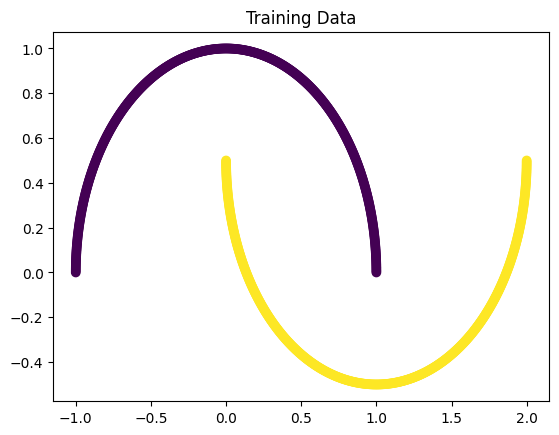

In [12]:
plot(X, y, 'Training Data')

Now we train an SVM with a linear kernel to see if we can fit this data perfectly:

     pcost       dcost       gap    pres   dres
 0: -3.2720e+02 -1.8264e+03  7e+03  2e+00  1e-14
 1: -2.3235e+02 -9.7957e+02  1e+03  1e-01  8e-15
 2: -2.2905e+02 -3.4203e+02  1e+02  2e-02  6e-15
 3: -2.4978e+02 -2.8547e+02  4e+01  4e-03  6e-15
 4: -2.5391e+02 -2.7674e+02  3e+01  2e-03  6e-15
 5: -2.5698e+02 -2.7071e+02  1e+01  1e-03  6e-15
 6: -2.5843e+02 -2.6799e+02  1e+01  8e-04  6e-15
 7: -2.5976e+02 -2.6564e+02  6e+00  4e-04  7e-15
 8: -2.6071e+02 -2.6363e+02  3e+00  7e-05  8e-15
 9: -2.6151e+02 -2.6266e+02  1e+00  2e-05  7e-15
10: -2.6202e+02 -2.6206e+02  4e-02  1e-08  8e-15
11: -2.6204e+02 -2.6204e+02  9e-04  3e-10  8e-15
12: -2.6204e+02 -2.6204e+02  2e-05  5e-12  8e-15
Optimal solution found.


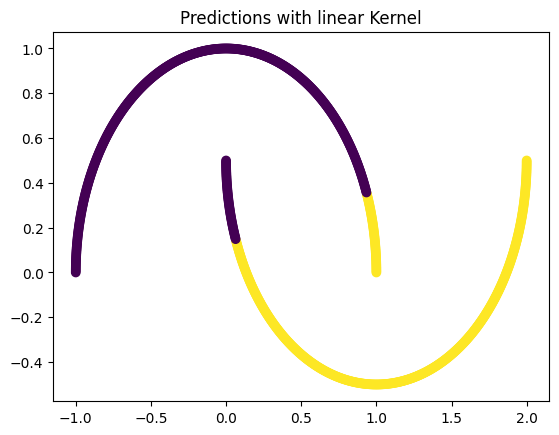

In [13]:
def K_linear(xi, xj):
    return np.inner(xi, xj)

svm = SVM(kernel=K_linear, C=1)
svm.fit(X, y)
preds = svm.predict(X)
plot(X, preds, 'Predictions with linear Kernel')

We see that we are not able to lineraly separate the two classes with a linear kernel. Now we try again with RBF kernel:

     pcost       dcost       gap    pres   dres
 0: -3.4068e+01 -1.2321e+03  5e+03  2e+00  3e-15
 1: -1.8129e+01 -4.7311e+02  5e+02  3e-02  3e-15
 2: -3.2211e+01 -8.9250e+01  6e+01  3e-03  3e-15
 3: -3.8189e+01 -5.5227e+01  2e+01  9e-04  2e-15
 4: -4.0384e+01 -4.9987e+01  1e+01  2e-04  2e-15
 5: -4.1768e+01 -4.5691e+01  4e+00  8e-05  2e-15
 6: -4.2363e+01 -4.4184e+01  2e+00  3e-05  2e-15
 7: -4.2703e+01 -4.3476e+01  8e-01  1e-05  2e-15
 8: -4.2917e+01 -4.3079e+01  2e-01  3e-15  3e-15
 9: -4.2976e+01 -4.3012e+01  4e-02  5e-15  3e-15
10: -4.2989e+01 -4.2997e+01  8e-03  7e-16  3e-15
11: -4.2992e+01 -4.2993e+01  4e-04  4e-15  3e-15
12: -4.2993e+01 -4.2993e+01  4e-06  2e-15  3e-15
Optimal solution found.


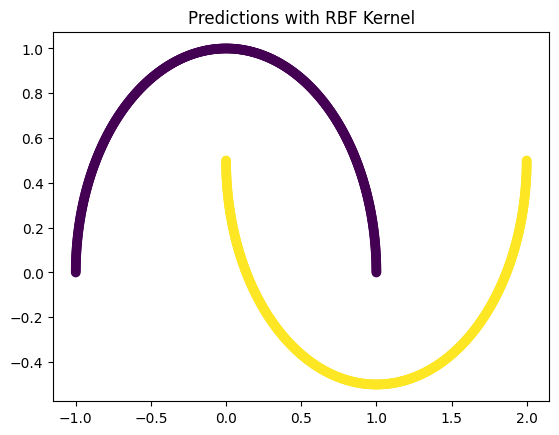

In [14]:
def K_rbf(xi, xj, s2=1):
    diff = xi - xj
    return np.exp(-(np.sum(diff**2))/2/s2)

svm = SVM(kernel=K_rbf, C=1)
svm.fit(X, y)
preds = svm.predict(X)
plot(X, preds, 'Predictions with RBF Kernel')

We see that we can separate these classes with the RBF kernel.

## What We Have Learned

In this discussion, we accomplished the following:

* Provided an overview of SVM.
* Discussed the dual formulation of SVM.
* Created the necessary matrices and used the `CVXOPT` library in `Python` to fit the SVM model.
* Created a binary classification dataset and applied our implementation and saw how a kernel function can help with linearly non-separable data.

Hope you have enjoyed this lesson!